In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#读取数据
df=pd.read_csv("0x260_time.csv",encoding="gbk")
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)
# 数据预处理

df1 = df[df.columns[1:]]  # 获得数据域内容的数据

ss = MinMaxScaler()
ss.fit(df1)
df1= pd.DataFrame(ss.transform(df1), columns=df1.columns)

df2 = pd.DataFrame(df[df.columns[0]])    # 获得 时间间隔内容  数据

ss2 = MinMaxScaler()
ss2.fit(df2)
df2 = pd.DataFrame(ss2.transform(df2), columns=df2.columns)

df2 = df2['timestamp']

#制作 数据域内容的 数据集
traindate=[]
target=[]
for i in range(6,df1.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df1.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df1.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

print('train.shape:',traindate.shape)
print('target.shape:',target.shape)

X_train,X_test,y_train,y_test=train_test_split(traindate,target,test_size=0.1,random_state=165)

# 时间间隔 训练数据集生成
ttraindate=[]
ttarget=[]
for i in range(6,df2.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list([df2.loc[j]]))
    
    ttraindate.append(tmp)
    ttarget.append(list([df2.loc[i]]))

ttraindate=np.array(ttraindate)
ttarget=np.array(ttarget)

TX_train,TX_test,ty_train,ty_test=train_test_split(ttraindate,ttarget,test_size=0.1,random_state=165)

train.shape: (32672, 6, 6)
target.shape: (32672, 6)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3268/3268 [==============================] - 1s 171us/sample - loss: 5.6128e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 5.6128e-04
0 条数据


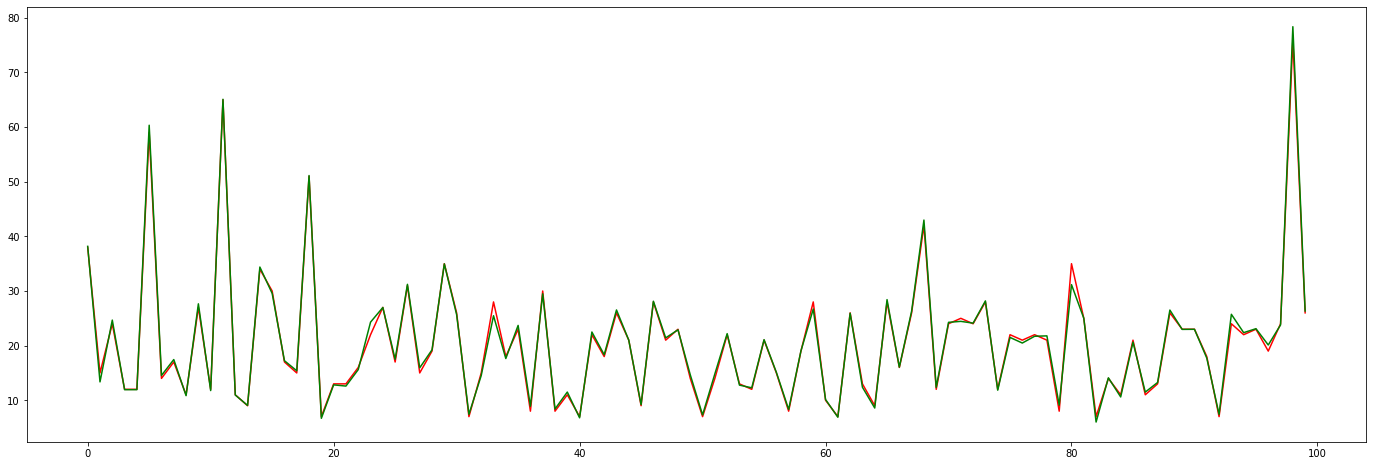

1 条数据


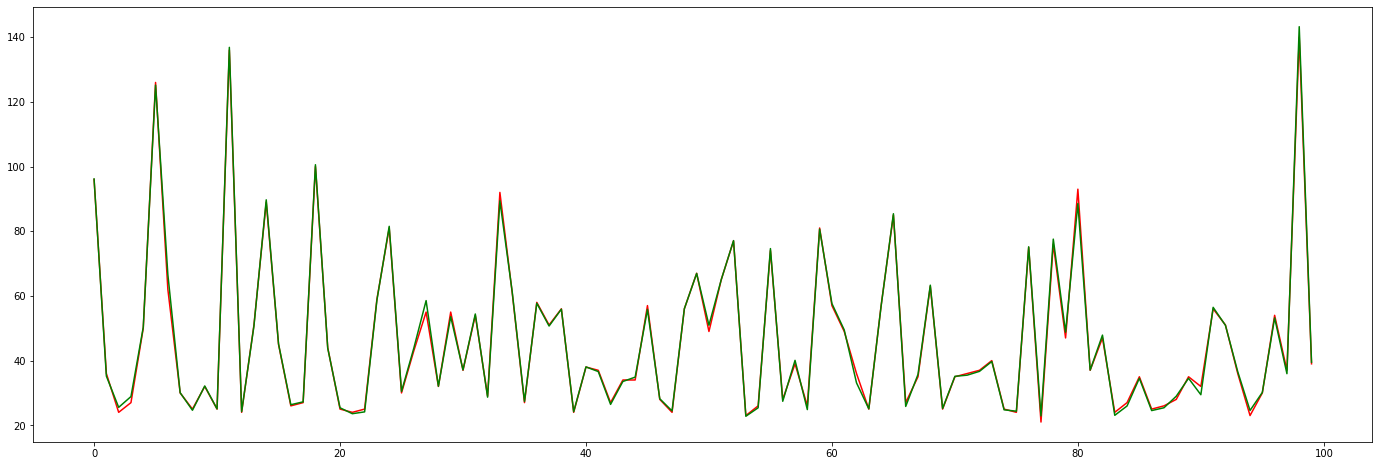

2 条数据


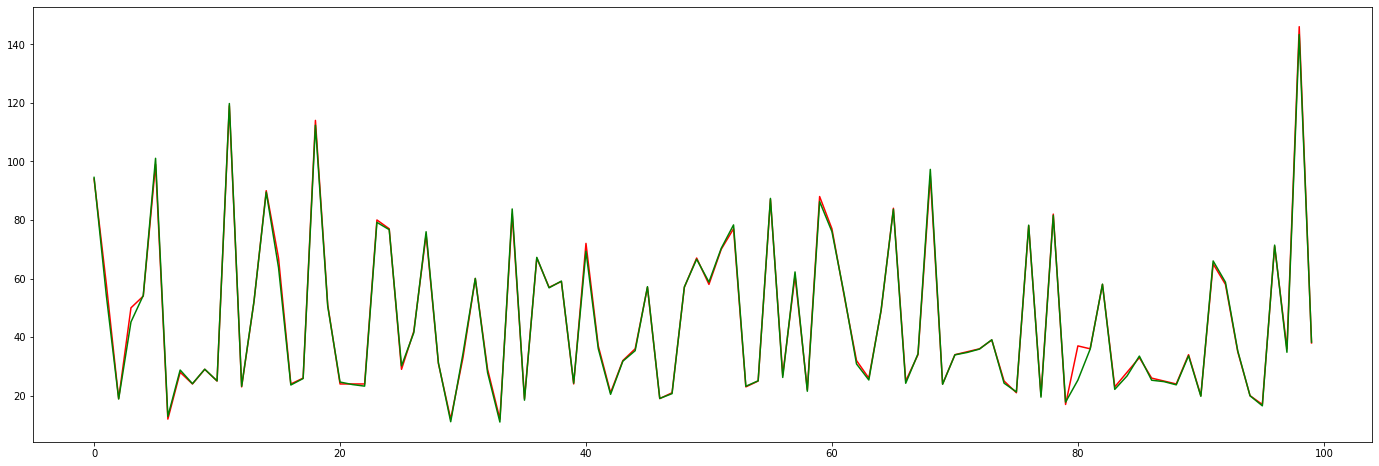

3 条数据


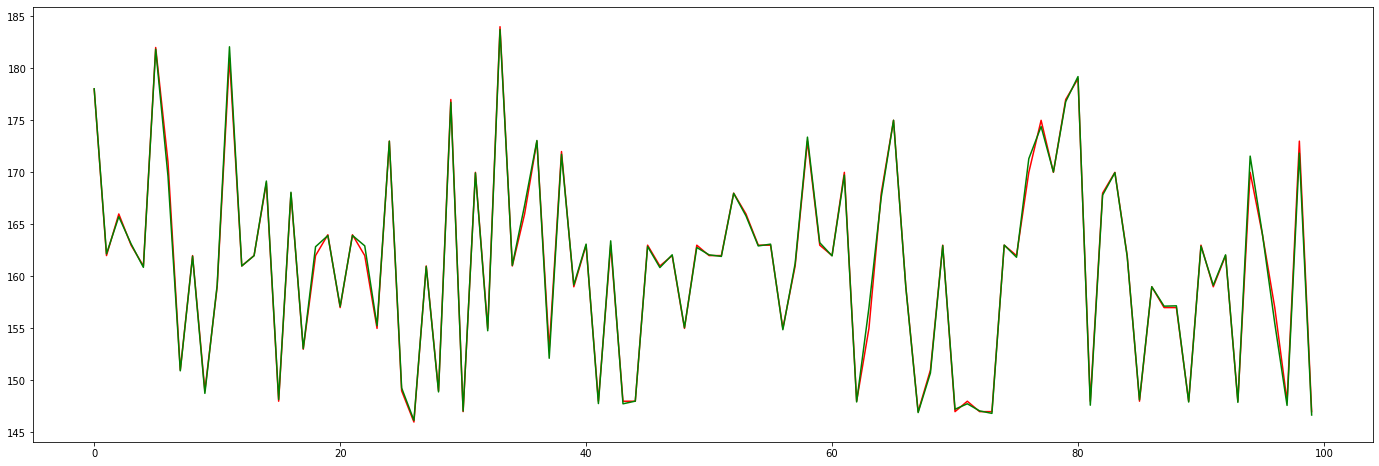

4 条数据


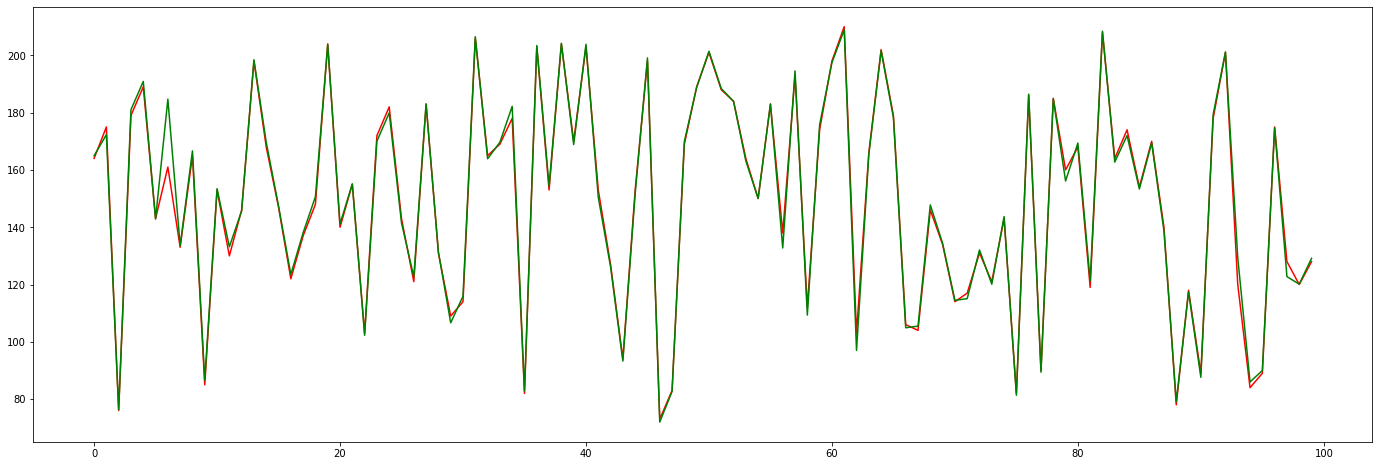

5 条数据


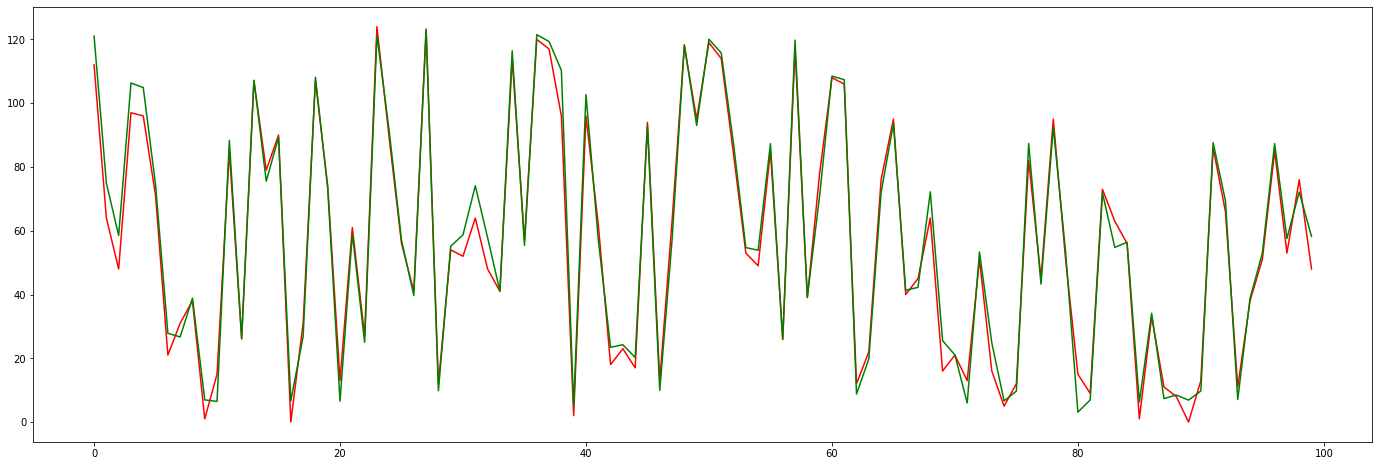

In [6]:
# Test
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model_new=load_model("filter.hdf5")  #加载最好的模型
model_new.evaluate( X_test, y_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new.predict( X_test))

y_pre = ss.inverse_transform(y_pre)
y_testt = ss.inverse_transform(y_test)
for i in range(6):
    print (i,"条数据")
    plt.figure(figsize=(24,8))
    plt.plot(y_testt[:,i][:100], c='red')
    plt.plot(y_pre[:,i][:100], c='g')
    plt.show()
    plt.close()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
3268/3268 [==============================] - 1s 291us/sample - loss: 0.0025 - mean_absolute_error: 0.0231 - mean_squared_error: 0.0025
0 条数据


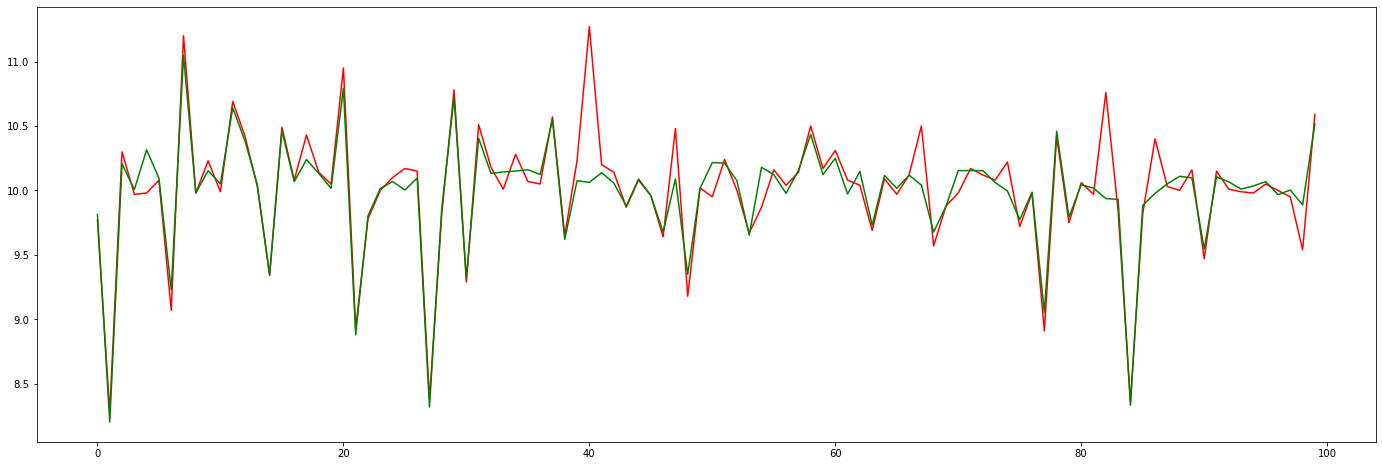

In [2]:
# Test
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

'''lay_names = []
for lay in model_new.layers:
    lay_names.append(lay.name)'''

model_new2 = load_model("filter_2.hdf5")  #加载最好的模型
model_new2.evaluate(TX_test, ty_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new2.predict(TX_test))

y_pre = ss2.inverse_transform(y_pre.reshape(-1, 1))
y_testt = ss2.inverse_transform(ty_test)
for i in range(1):
    print (i,"条数据")
    plt.figure(figsize=(24,8))
    plt.plot(y_testt[:,i][170:270], c='red')
    plt.plot(y_pre[:,i][170:270], c='g')
    plt.show()
    plt.close()



In [1]:
## your test_data

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

loss1 = 0.014
loss2 = 0.0279
w1 = 2
w2 = 2

model_new=load_model("filter.hdf5")  #加载最好的模型
model_new2 = load_model("filter2.hdf5")


df = pd.read_csv('obo_test.csv', encoding="gbk")
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df)
constant_columns=[column for column in df.columns
                  if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=constant_columns,axis=1,inplace=True)

df1 = df[df.columns[1:]]
df1= pd.DataFrame(ss.transform(df1), columns=df1.columns)

df2 = pd.DataFrame(df[df.columns[0]])
df2 = pd.DataFrame(ss2.transform(df2), columns=df2.columns)
df2 = df2['timestamp']
for i in range(6,df1.shape[0]):
    tmp1 = []
    tmp2 = []
    for j in range(i-6,i):
        tmp1.append(list(df1.loc[j]))
        tmp2.append(list([df2.loc[j]]))
        
        
    pre_data = model_new.predict(np.array(tmp1).reshape(-1, 6, 6))
    loss_data = mean_absolute_error(pre_data[0], list(df1.loc[i]))
    pre_time = model_new2.predict(np.array(tmp2).reshape(-1, 6, 1))
    loss_time = mean_absolute_error(pre_time, list([df2.loc[i]]))
    
    print('ture_time:', list([df2.loc[i]])[0], end = ' ')
    print('ture_data:', list(df1.loc[i]))
    if loss_data < w1*loss1 and loss_time < w2*loss2:
        print('pre_time:', pre_time[0][0], end = ' ')
        print('pre_data:', pre_data)
        
    else:
        break


SyntaxError: invalid syntax (<ipython-input-1-b17228a761ab>, line 50)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6, 6)]       0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 6, 96)        21120       input_1[0][0]                    
_______________________________________________________

Epoch 15/200
29404/29404 [==============================] - 4s 128us/sample - loss: 0.0083 - mean_absolute_error: 0.0617 - mean_squared_error: 0.0083 - val_loss: 0.0072 - val_mean_absolute_error: 0.0556 - val_mean_squared_error: 0.0072
Epoch 16/200
29404/29404 [==============================] - 4s 134us/sample - loss: 0.0070 - mean_absolute_error: 0.0557 - mean_squared_error: 0.0070 - val_loss: 0.0064 - val_mean_absolute_error: 0.0508 - val_mean_squared_error: 0.0064
Epoch 17/200
29404/29404 [==============================] - 4s 149us/sample - loss: 0.0063 - mean_absolute_error: 0.0516 - mean_squared_error: 0.0063 - val_loss: 0.0058 - val_mean_absolute_error: 0.0472 - val_mean_squared_error: 0.0058
Epoch 18/200
29404/29404 [==============================] - 4s 152us/sample - loss: 0.0058 - mean_absolute_error: 0.0487 - mean_squared_error: 0.0058 - val_loss: 0.0053 - val_mean_absolute_error: 0.0439 - val_mean_squared_error: 0.0053
Epoch 19/200
29404/29404 [==============================

Epoch 50/200
29404/29404 [==============================] - 3s 114us/sample - loss: 0.0013 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0013 - val_loss: 0.0010 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 0.0010
Epoch 51/200
29404/29404 [==============================] - 3s 119us/sample - loss: 0.0013 - mean_absolute_error: 0.0217 - mean_squared_error: 0.0013 - val_loss: 9.8498e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 9.8498e-04
Epoch 52/200
29404/29404 [==============================] - 3s 104us/sample - loss: 0.0013 - mean_absolute_error: 0.0216 - mean_squared_error: 0.0013 - val_loss: 9.8753e-04 - val_mean_absolute_error: 0.0166 - val_mean_squared_error: 9.8753e-04
Epoch 53/200
29404/29404 [==============================] - 3s 106us/sample - loss: 0.0013 - mean_absolute_error: 0.0215 - mean_squared_error: 0.0013 - val_loss: 9.7962e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 9.7962e-04
Epoch 54/200
29404/29404 [======

Epoch 84/200
29404/29404 [==============================] - 3s 108us/sample - loss: 0.0011 - mean_absolute_error: 0.0191 - mean_squared_error: 0.0011 - val_loss: 8.1925e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 8.1925e-04
Epoch 85/200
29404/29404 [==============================] - 3s 115us/sample - loss: 0.0011 - mean_absolute_error: 0.0190 - mean_squared_error: 0.0011 - val_loss: 8.1896e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 8.1896e-04
Epoch 86/200
29404/29404 [==============================] - 3s 109us/sample - loss: 0.0010 - mean_absolute_error: 0.0190 - mean_squared_error: 0.0010 - val_loss: 8.1463e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 8.1463e-04
Epoch 87/200
29404/29404 [==============================] - 3s 108us/sample - loss: 0.0010 - mean_absolute_error: 0.0190 - mean_squared_error: 0.0010 - val_loss: 8.2148e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 8.2148e-04
Epoch 88/200
29404/29404

Epoch 117/200
29404/29404 [==============================] - 3s 118us/sample - loss: 9.0440e-04 - mean_absolute_error: 0.0177 - mean_squared_error: 9.0440e-04 - val_loss: 7.2688e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 7.2688e-04
Epoch 118/200
29404/29404 [==============================] - 4s 119us/sample - loss: 9.0049e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 9.0049e-04 - val_loss: 7.2654e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 7.2654e-04
Epoch 119/200
29404/29404 [==============================] - 3s 111us/sample - loss: 9.0074e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 9.0075e-04 - val_loss: 7.2293e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 7.2293e-04
Epoch 120/200
29404/29404 [==============================] - 3s 108us/sample - loss: 9.0116e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 9.0116e-04 - val_loss: 7.2376e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error:

29404/29404 [==============================] - 3s 103us/sample - loss: 7.2201e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 7.2201e-04 - val_loss: 6.1436e-04 - val_mean_absolute_error: 0.0120 - val_mean_squared_error: 6.1436e-04
Epoch 182/200
29404/29404 [==============================] - 3s 115us/sample - loss: 7.2062e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 7.2062e-04 - val_loss: 6.2217e-04 - val_mean_absolute_error: 0.0122 - val_mean_squared_error: 6.2218e-04
Epoch 183/200
29404/29404 [==============================] - 3s 107us/sample - loss: 7.2217e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 7.2217e-04 - val_loss: 6.1485e-04 - val_mean_absolute_error: 0.0122 - val_mean_squared_error: 6.1485e-04
Epoch 184/200
29404/29404 [==============================] - 3s 105us/sample - loss: 7.1737e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 7.1737e-04 - val_loss: 6.1716e-04 - val_mean_absolute_error: 0.0123 - val_mean_squared_error: 6.1716e-04
Ep

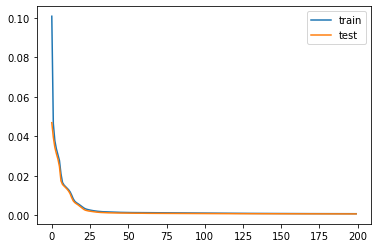

In [3]:
#模型训练
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

def attention_3d_block(inputs):
    
    input_dim = int(inputs.shape[2]) 
    a = Permute((2, 1))(inputs)           #将 timesteps 与 input_dim 维对换 
    a = Reshape((input_dim, X_train.shape[1]))(a)  
    a = Dense(X_train.shape[1], activation='softmax')(a)
    a_probs = Permute((2, 1), name='attention_vec')(a)
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul


# Model for DataDomin
callbacks = [EarlyStopping(monitor='val_loss', verbose=1, patience=1111),
			 ModelCheckpoint("filter_1.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))    # 6x9
context1 = Bidirectional(LSTM(48, return_sequences=True))(inputs)  #lstm神经元数量为48个 激活函数为relu
atten = attention_3d_block(context1)
drop = Dropout(0.2)(atten)
atten = Flatten()(drop)

x = Dense(64, activation='relu')(atten)
x = Dense(32, activation='relu')(x)
x = Dense(12, activation='relu')(x)


output = Dense(target.shape[1], activation='relu')(x)
model = Model(inputs=[inputs ], outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])
model.summary()  
history = model.fit(X_train, y_train, epochs=200, batch_size=2000, callbacks=callbacks,validation_data=( X_test, y_test), verbose=1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show() 



In [ ]:
# Model for TimeDomin
callbacks2 = [EarlyStopping(monitor='val_loss', verbose=1, patience=1111),
			 ModelCheckpoint("filter_3.hdf5", monitor='val_mean_absolute_error',
							 mode='min', verbose=0, save_best_only=True)]   
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

inputs = Input(shape=(TX_train.shape[1], TX_train.shape[2]))    # 6x9
context1 = Bidirectional(LSTM(48, return_sequences=True))(inputs)  #lstm神经元数量为48个 激活函数为relu
atten = attention_3d_block(context1)
drop = Dropout(0.2)(atten)
atten = Flatten()(drop)


x2 = Dense(256, activation='relu')(atten)
x2 = Dense(128, activation='relu')(x2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)
x2 = Dense(12, activation='relu')(x2)

output2 = Dense(ttarget.shape[1], activation='relu')(x2)

model2 = Model(inputs=inputs, outputs=output2)
model2.compile(loss='mean_squared_error', optimizer='adam',metrics =['mae','mse'])
model2.summary() 

history2 = model2.fit(TX_train, ty_train, epochs=200, batch_size=2000, callbacks=callbacks2,validation_data=(TX_test, ty_test), verbose=1)

plt.figure()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()


'''plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()'''

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6, 1)]       0                                            
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 6, 96)        19200       input_4[0][0]                    
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 96, 6)        0           bidirectional_2[0][0]            
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 96, 6)        0           permute_2[0][0]                  
____________________________________________________________________________________________

29404/29404 [==============================] - 10s 356us/sample - loss: 0.0027 - mean_absolute_error: 0.0280 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_absolute_error: 0.0250 - val_mean_squared_error: 0.0024
Epoch 55/1200
29404/29404 [==============================] - 11s 364us/sample - loss: 0.0027 - mean_absolute_error: 0.0278 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0024
Epoch 56/1200
29404/29404 [==============================] - 9s 309us/sample - loss: 0.0027 - mean_absolute_error: 0.0282 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_absolute_error: 0.0241 - val_mean_squared_error: 0.0024
Epoch 57/1200
29404/29404 [==============================] - 9s 315us/sample - loss: 0.0027 - mean_absolute_error: 0.0278 - mean_squared_error: 0.0027 - val_loss: 0.0024 - val_mean_absolute_error: 0.0239 - val_mean_squared_error: 0.0024
Epoch 58/1200
29404/29404 [==============================] - 9s 

29404/29404 [==============================] - 9s 306us/sample - loss: 0.0026 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_absolute_error: 0.0246 - val_mean_squared_error: 0.0024
Epoch 123/1200
29404/29404 [==============================] - 9s 301us/sample - loss: 0.0026 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_absolute_error: 0.0274 - val_mean_squared_error: 0.0024
Epoch 124/1200
29404/29404 [==============================] - 9s 300us/sample - loss: 0.0026 - mean_absolute_error: 0.0273 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_absolute_error: 0.0248 - val_mean_squared_error: 0.0024
Epoch 125/1200
29404/29404 [==============================] - 11s 377us/sample - loss: 0.0026 - mean_absolute_error: 0.0274 - mean_squared_error: 0.0026 - val_loss: 0.0024 - val_mean_absolute_error: 0.0251 - val_mean_squared_error: 0.0024
Epoch 126/1200
29404/29404 [==============================] - 

In [ ]:
## your test_data

df = pd.read_csv('1.csv', encoding="gbk")
# constant_filter = VarianceThreshold(threshold=0)
# constant_filter.fit(df)
# constant_columns=[column for column in df.columns
#                   if column not in df.columns[constant_filter.get_support()]]
df.drop(labels=['byte5', 'byte4'],axis=1,inplace=True)

df = pd.DataFrame(ss.transform(df))

traindate=[]
target=[]
for i in range(6,df.shape[0]):
    tmp=[]
    for j in range(i-6,i):
        tmp.append(list(df.loc[j]))
    
    traindate.append(tmp)
    target.append(list(df.loc[i]))

traindate=np.array(traindate)
target=np.array(target)

X_test = traindate
y_test = target

from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

model_new=load_model("filter.hdf5")  #加载最好的模型
model_new.evaluate( X_test, y_test)  #计算测试集的val_loss
y_pre=np.squeeze(model_new.predict( X_test))

y_pre = ss.inverse_transform([y_pre])
y_testt = ss.inverse_transform(y_test)

a = list(y_pre[0][:3])
a.extend([48.0, 2.0])
a.extend(list(y_pre[0][3:]))

b = list(y_testt[0][:3])
b.extend([48.0, 2.0])
b.extend(list(y_testt[0][3:]))

print('true:', b)
print('predict:', a)